<a href="https://colab.research.google.com/github/sujarins/project/blob/main/model_trainging_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install emnist

In [ ]:
#eminst dataset (pypi) (https://pypi.org/project/emnist/)
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

#visualize tools
import cv2
import matplotlib.pyplot as plt

#basic tools
import pandas as pd
import numpy as np

#tensorflow
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#import emnist dataset from pypi
print('list_dataset: ',list_datasets())

#extract training and testing
X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

#re-check shape
print('training_shape: ', X_train.shape)
print('training_label_shape: ', y_train.shape)
print('test_shape: ', X_test.shape)
print('test_label_shape: ', y_test.shape)

list_dataset:  ['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
training_shape:  (124800, 28, 28)
training_label_shape:  (124800,)
test_shape:  (20800, 28, 28)
test_label_shape:  (20800,)


**<font size=5>Defines all function here**

In [ ]:
#preparing function for preprocessing and visualize samples
def why_u_not_create_function(image):
    #sharpen an image (got from https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv)
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp1 = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)

    #using inverse binary threshold  (got from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
    thresh = 127
    maxval = 255
    ret,thres = cv2.threshold(image_sharp1,thresh,maxval,cv2.THRESH_BINARY_INV)
    #return ret, thres, image_sharp1
    return ret, image_sharp1, image_sharp1

'''
def interpolation_thres(thres, i): #nearest, area, cubic, linear
    bgr = np.dstack((thres,thres,thres))
    interpolation = cv2.resize(bgr,
                               (224, 224),
                               interpolation= i)

    return interpolation
'''

'''
def why_u_not_create_visualize_function(image, cmap): #optional for visual one pic
    fig = plt.figure(figsize=(8,4))
    plt.imshow( image, cmap=cmap )
    plt.clim(vmin=0, vmax = 255)
    plt.colorbar()
'''

def visualize_after_filter(rows, cols, cmaps, image, labels):
    row = rows
    col = cols
    num_pic = row*col
    fig = plt.figure(figsize=(10,6))
    for j in range(num_pic):
        plt.subplot(row, col, j+1)
        #plt.imshow(image[col+j], cmap=cmaps)
        plt.imshow(image[j], cmap=cmaps)
        #plt.title(labels[col+j])
        plt.title(labels[j])
        plt.axis('off') #ถ้าอยากเอา scale ภาพออกให้ set off
    plt.show()


def visualize_all(row, col, cmap, viz_list):
    viz_lst = viz_list

    for i in viz_lst:
        #training
        print('*'*20,str(i[2]),'*'*20)
        visualize_after_filter(rows=row,
                               cols=col,
                               cmaps=cmap,
                               image=i[0],
                               labels=training_labels)
        print(str(i[2]),'.shape: ',np.array(i[0]).shape,'\n')

        #testing
        print('*'*20,str(i[3]),'*'*20)
        visualize_after_filter(rows=row,
                               cols=col,
                               cmaps=cmap,
                               image=i[1],
                               labels=test_labels)
        print(str(i[3]),'.shape: ',np.array(i[1]).shape,'\n')

        print('*'*58,'\n')



In [ ]:
#training
train_thres_deck = []
train_sharp_deck = []
training_labels = []

train_inter_area = []
train_cubic = []
train_nearest = []
train_linear = []
for i in range(len(X_train)):
    ret, thres, img_sharp = why_u_not_create_function(X_train[i])

    #interpolation
    pic_inter_area_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_LINEAR)

    #append
    train_thres_deck.append(thres)
    train_sharp_deck.append(img_sharp)
    training_labels.append(y_train[i])

    train_inter_area.append(pic_inter_area_train)
    train_cubic.append(pic_cubic_train)
    train_nearest.append(pic_nearest_train)
    train_linear.append(pic_linear_train)

#testing
test_thres_deck = []
test_sharp_deck = []
test_labels = []

test_inter_area = []
test_cubic = []
test_nearest = []
test_linear = []
for i in range(len(X_test)):
    ret, thres_test, img_sharp_test = why_u_not_create_function(X_test[i])

    #interpolation
    pic_inter_area_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_LINEAR)

    #append
    test_thres_deck.append(thres_test)
    test_sharp_deck.append(img_sharp_test)
    test_labels.append(y_test[i])

    test_inter_area.append(pic_inter_area_test)
    test_cubic.append(pic_cubic_test)
    test_nearest.append(pic_nearest_test)
    test_linear.append(pic_linear_test)

print('number of training',len(train_thres_deck))
print('number of training_labels',len(training_labels))

print('*'*40)
print('number of test',len(test_thres_deck))
print('number of test_labels',len(test_labels))

number of training 124800
number of training_labels 124800
****************************************
number of test 20800
number of test_labels 20800


**<font size=5>Visualize All**

In [ ]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = int(input('input rows(number):')) #จะให้ viz กี่แถว
col = int(input('input cols(number):')) #จะให้ viz กี่คอลัมน์
cmap = input('which cmap??: ') #binary, jet

viz_lst = [[X_train, X_test, 'train_orinal', 'test_orinal'],
            [train_sharp_deck, test_sharp_deck, 'train_sharp', 'test_sharp'],
            [train_thres_deck, test_thres_deck, 'train_threshold binary inv', 'test_threshold binary inv']]

visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_lst)

5**<font size=5>Interpolation**

In [ ]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = int(input('input rows(number):')) #จะให้ viz กี่แถว
col = int(input('input cols(number):')) #จะให้ viz กี่คอลัมน์
cmap = input('which cmap??: ') #binary, jet

viz_lst = [[train_inter_area, test_inter_area, 'train_inter_area', 'test_inter_area'],
            [train_cubic, test_cubic, 'train_cubic', 'test_cubic'],
            [train_nearest, test_nearest, 'train_nearest', 'test_nearest'],
            [train_linear, test_linear, 'train_linear', 'test_linear']
                ]

visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_lst)

555**<font size=5>Data Augmentation**

In [ ]:
#threshold binary inverse
#thres_train = np.array(train_thres_deck)
#x_train_thres = thres_train.reshape(thres_train.shape[0], 3, 28, 28, order='A')

# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel
#thres_train = np.dstack([train_thres_deck] * 3)
# Reshape images as per the tensor format required by tensorflow
#x_train_thres = thres_train.reshape(-1, 28, 28, 3)

x_train_thres= np.stack((train_cubic,)*3, axis=-1)
#x_train_thres_check_pic = np.moveaxis(x_train_thres, 3, 1)

print('train_thres_deck:',x_train_thres.shape)
print('thres_binary_inv_training:',x_train_thres.shape)
#print('thres_binary_inv_training_check_pic:',x_train_thres_check_pic.shape)



x_test_thres= np.stack((test_cubic,)*3, axis=-1)
x_test_thres_check_pic = np.moveaxis(x_test_thres, 3, 1)

#thres_test = np.array(test_thres_deck)
#x_test_thres = thres_test.reshape(thres_train.shape[0], 3, 28, 28, order='A')

print('train_thres_deck:',thres_test.shape)
print('thres_binary_inv_test:',x_test_thres.shape)
#print('thres_binary_inv_test_check_pic:',x_test_thres_check_pic .shape)


#Data Augmentation
gen = ImageDataGenerator(rotation_range=12,
                        width_shift_range=0.1,
                        shear_range=0.3,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        data_format='channels_first')

#flow เข้า model ตรงนี้ ถ้าจะเอาไป train
batch_size = 512
train_batches = gen.flow(x_train_thres, training_labels, batch_size=batch_size)
test_batches = gen.flow(x_test_thres, test_labels, batch_size=batch_size)

steps_per_epoch = int(np.ceil(train_batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

train_thres_deck: (124800, 64, 64, 3)
thres_binary_inv_training: (124800, 64, 64, 3)
train_thres_deck: (28, 28)
thres_binary_inv_test: (20800, 64, 64, 3)


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (124800, 64, 64, 3) (64 channels).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (20800, 64, 64, 3) (64 channels).
  warnings.warn(


In [ ]:
#training
#reshape image
img = np.expand_dims(x_train_thres_check_pic[0], axis=0)
aug_iter = gen.flow(img)
aug_img = next(aug_iter)[0].astype(np.float32)


#visualize image after augmented
#num_img = int(input('number of pics u wanna see(input only number):'))
num_img = 8
f = plt.figure(figsize=(10,6))
for i in range(num_img):
    sp = f.add_subplot(2, 26//3, i+1)
    sp.axis('Off')
    aug_img = next(aug_iter)[0].astype(np.float32)
    plt.imshow(aug_img[0], cmap='gray')

NameError: ignored

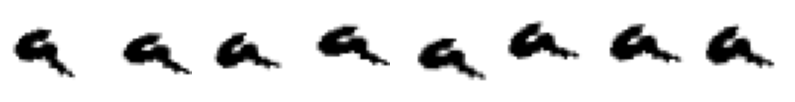

In [ ]:
#testing
#reshape image
img = np.expand_dims(x_test_thres_check_pic[0], axis=0)
aug_iter = gen.flow(img)
aug_img = next(aug_iter)[0].astype(np.float32)


#visualize image after augmented
#num_img = int(input('number of pics u wanna see(input only number):'))
num_img = 8
f = plt.figure(figsize=(10,6))
for i in range(num_img):
    sp = f.add_subplot(2, 26//3, i+1)
    sp.axis('Off')
    aug_img = next(aug_iter)[0].astype(np.float32)
    plt.imshow(aug_img[0], cmap='gray')

<h1> training </h1>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#set seed (gor from https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras)
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions:
# tf.compat.v1.set_random_seed(seed_value)

In [ ]:
input_layer=layers.Input(shape=(64,64,3))
base_model = VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
#base_model = VGG16(weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
#x = GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
#x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
#x = Dense(64, activation='relu')(x)
preds = Dense(26, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
for layer in model.layers[:20]:
    layer.trainable = False
for layer in model.layers[20:]:
    layer.trainable = True

In [ ]:

from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(training_labels)
test__y_labels = label_as_binary.fit_transform(test_labels)


In [ ]:
gen = ImageDataGenerator(rotation_range=12,
                        width_shift_range=0.1,
                        shear_range=0.3,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        data_format='channels_first')
#flow เข้า model ตรงนี้ ถ้าจะเอาไป train
batch_size = 256
train_batches = gen.flow(x_train_thres, train__y_labels , batch_size=batch_size)
test_batches = gen.flow(x_test_thres,test__y_labels,batch_size=batch_size)

steps_per_epoch = int(np.ceil(train_batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

In [ ]:
#check shape
print(f"x_train_thres.shape : {x_train_thres.shape}")
print(f"train__y_labels.shape : {train__y_labels.shape}")
print(f"x_test_thres.shape : {x_test_thres.shape}")
print(f"test__y_labels.shape : {test__y_labels.shape}")


x_train_thres.shape : (124800, 64, 64, 3)
train__y_labels.shape : (124800, 26)
x_test_thres.shape : (20800, 64, 64, 3)
test__y_labels.shape : (20800, 26)


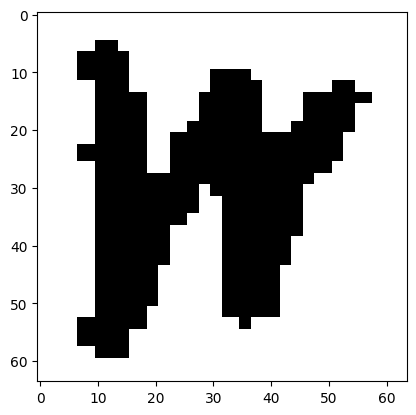

In [ ]:
x_train_thres[0]
plt.imshow(x_train_thres[0], cmap='gray')

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_batches, steps_per_epoch= steps_per_epoch, epochs=10)

Epoch 1/10
488/488 [==============================] - 495s 1s/step - loss: 0.7797 - accuracy: 0.8013
Epoch 2/10
488/488 [==============================] - 492s 1s/step - loss: 0.3472 - accuracy: 0.8899
Epoch 3/10
488/488 [==============================] - 490s 1s/step - loss: 0.2936 - accuracy: 0.9032
Epoch 4/10
488/488 [==============================] - 491s 1s/step - loss: 0.2654 - accuracy: 0.9117
Epoch 5/10
488/488 [==============================] - 492s 1s/step - loss: 0.2497 - accuracy: 0.9163
Epoch 6/10
488/488 [==============================] - 493s 1s/step - loss: 0.2369 - accuracy: 0.9188
Epoch 7/10
488/488 [==============================] - 490s 1s/step - loss: 0.2274 - accuracy: 0.9225
Epoch 8/10
488/488 [==============================] - 491s 1s/step - loss: 0.2194 - accuracy: 0.9241
Epoch 9/10
488/488 [==============================] - 492s 1s/step - loss: 0.2081 - accuracy: 0.9275
Epoch 10/10
488/488 [==============================] - 492s 1s/step - loss: 0.2066 - accura

In [ ]:
model.save('model_vgg16_text.h5')

In [ ]:
score = model.evaluate(test_batches)

82/82 [==============================] - 83s 999ms/step - loss: 0.3008 - accuracy: 0.9087


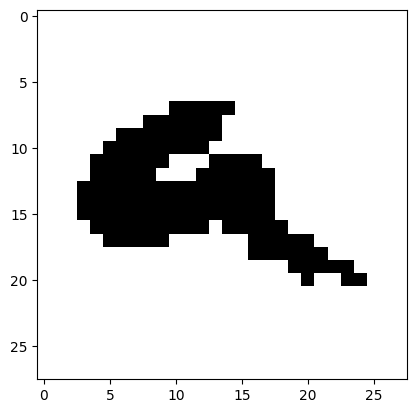

In [ ]:
x_test_thres[0]
plt.imshow(temp[0], cmap='gray')

In [ ]:
 prediction=model.predict(temp.reshape(1,48,48,3))

ValueError: ignored